In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Excel workbook
bird_strike_data = pd.read_excel('Bird Strikes data.xlsx')
print(bird_strike_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Record ID                                25558 non-null  int64         
 1   Aircraft: Type                           25429 non-null  object        
 2   Airport: Name                            25429 non-null  object        
 3   Altitude bin                             25429 non-null  object        
 4   Aircraft: Make/Model                     25558 non-null  object        
 5   Wildlife: Number struck                  25429 non-null  object        
 6   Wildlife: Number Struck Actual           25558 non-null  int64         
 7   Effect: Impact to flight                 25429 non-null  object        
 8   FlightDate                               25429 non-null  datetime64[ns]
 9   Effect: Indicated Damage               

In [3]:
# Display basic information about the dataset
print(bird_strike_data.info())

# Display the first few rows of the dataset
print(bird_strike_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Record ID                                25558 non-null  int64         
 1   Aircraft: Type                           25429 non-null  object        
 2   Airport: Name                            25429 non-null  object        
 3   Altitude bin                             25429 non-null  object        
 4   Aircraft: Make/Model                     25558 non-null  object        
 5   Wildlife: Number struck                  25429 non-null  object        
 6   Wildlife: Number Struck Actual           25558 non-null  int64         
 7   Effect: Impact to flight                 25429 non-null  object        
 8   FlightDate                               25429 non-null  datetime64[ns]
 9   Effect: Indicated Damage               

In [3]:
# Handle missing or inconsistent data
bird_strike_data.dropna(subset=['FlightDate', 'Airport: Name'], inplace=True)
bird_strike_data['FlightDate'] = pd.to_datetime(bird_strike_data['FlightDate'], errors='coerce')

# Add additional cleaning steps as needed

In [5]:
# Save the cleaned data for further use
bird_strike_data.to_excel('Bird Strikes data(clean).xlsx', index=False)

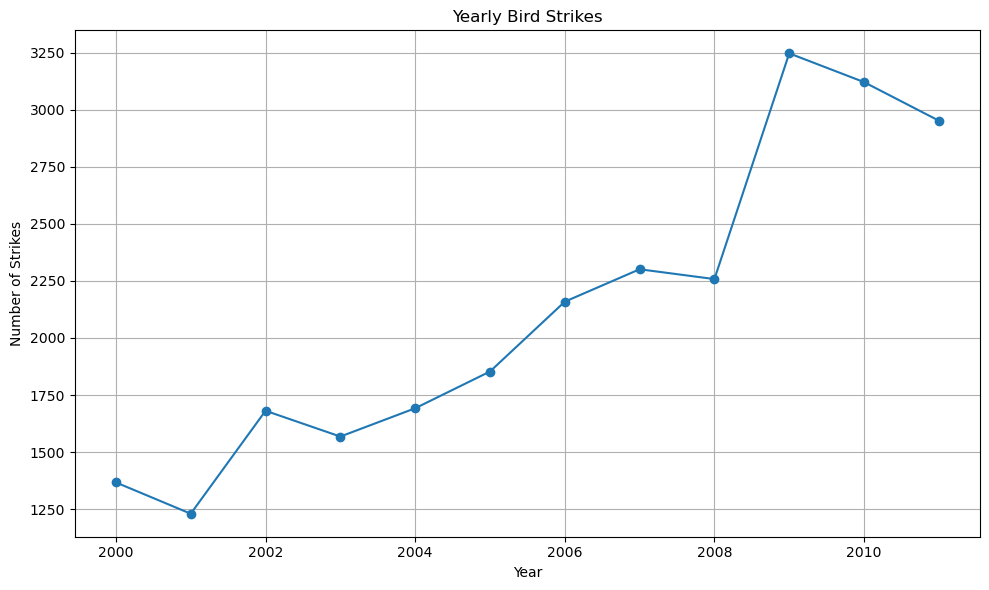

In [6]:
# Extract year from FlightDate
bird_strike_data['Year'] = bird_strike_data['FlightDate'].dt.year

# Group by year and count the number of bird strikes
yearly_strikes = bird_strike_data.groupby('Year').size()

# Create a line chart for yearly bird strikes
plt.figure(figsize=(10, 6))
yearly_strikes.plot(kind='line', marker='o')
plt.title('Yearly Bird Strikes')
plt.xlabel('Year')
plt.ylabel('Number of Strikes')
plt.grid(True)
plt.tight_layout()
plt.show()

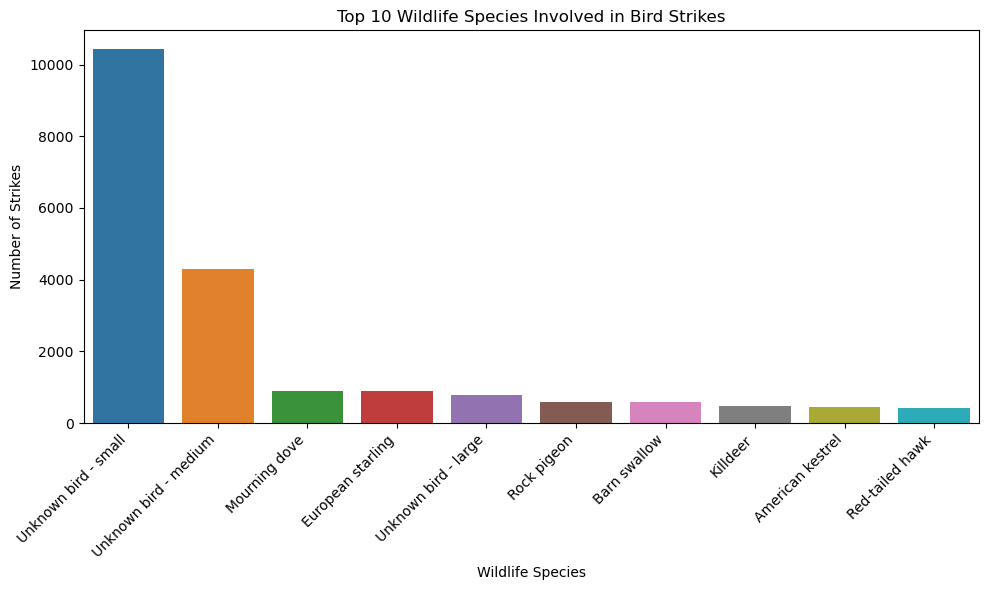

In [7]:
# Create a bar chart for number of bird strikes by wildlife species
plt.figure(figsize=(10, 6))
sns.countplot(x='Wildlife: Species', data=bird_strike_data, order=bird_strike_data['Wildlife: Species'].value_counts().index[:10])
plt.title('Top 10 Wildlife Species Involved in Bird Strikes')
plt.xlabel('Wildlife Species')
plt.ylabel('Number of Strikes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

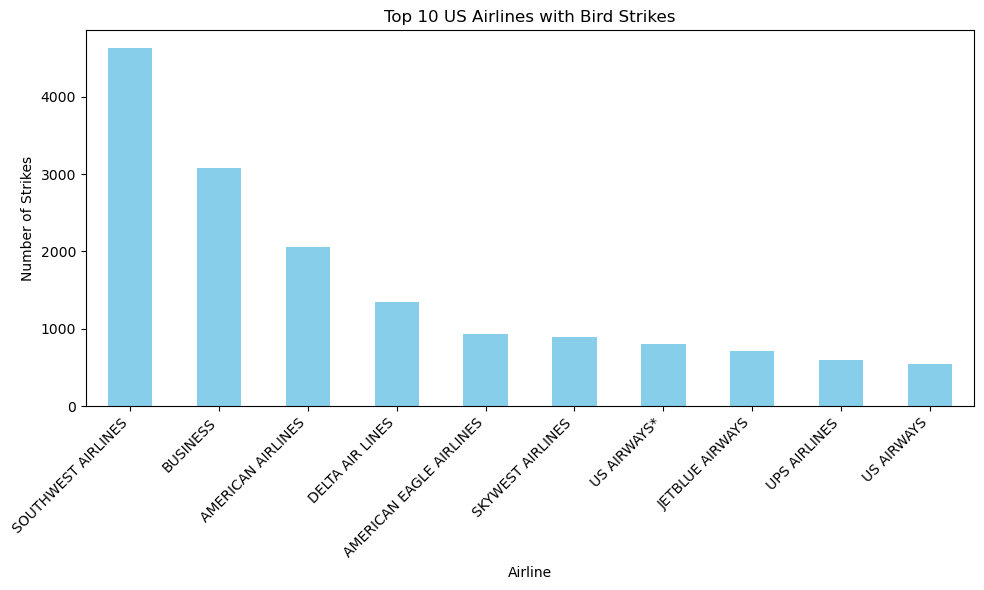

In [8]:
# Top 10 US Airlines with bird strikes
top_airlines = bird_strike_data['Aircraft: Airline/Operator'].value_counts().nlargest(10)

# Create a bar chart for top 10 airlines with bird strikes
plt.figure(figsize=(10, 6))
top_airlines.plot(kind='bar', color='skyblue')
plt.title('Top 10 US Airlines with Bird Strikes')
plt.xlabel('Airline')
plt.ylabel('Number of Strikes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

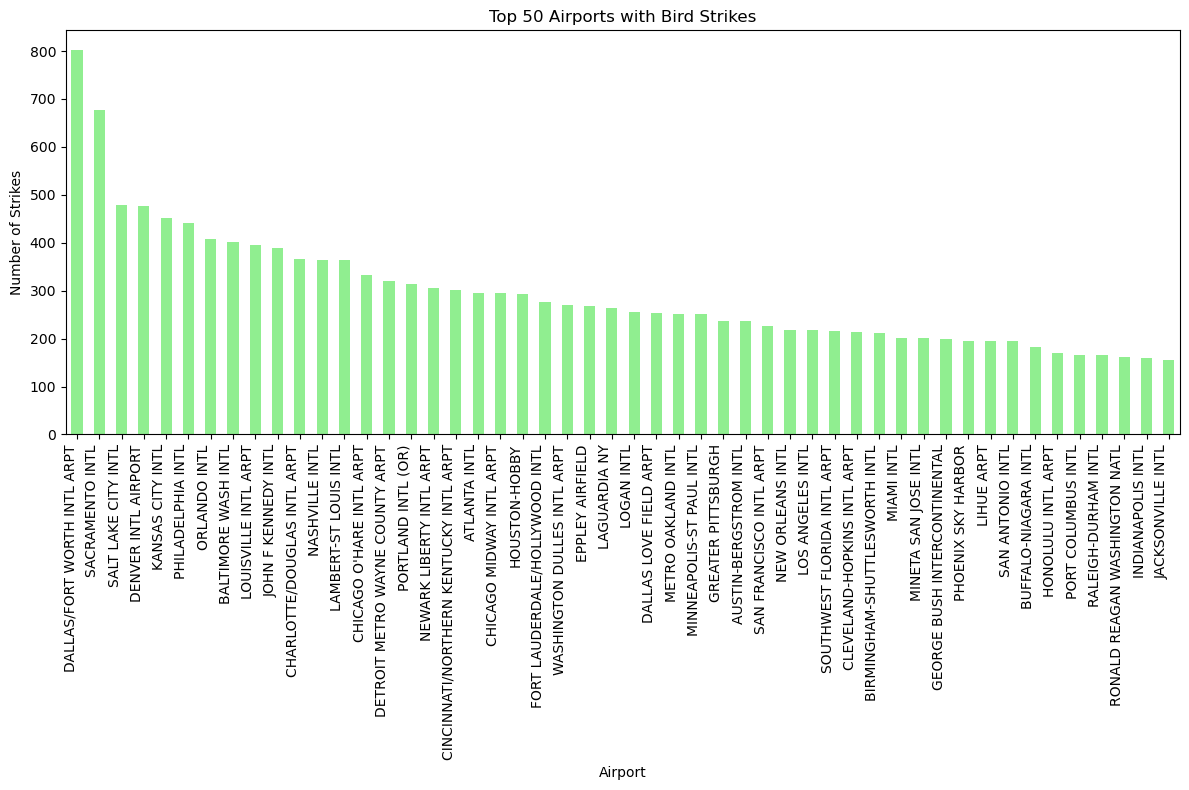

In [9]:
# Top 50 Airports with bird strikes
top_airports = bird_strike_data['Airport: Name'].value_counts().nlargest(50)

# Create a bar chart for top 50 airports with bird strikes
plt.figure(figsize=(12, 8))
top_airports.plot(kind='bar', color='lightgreen')
plt.title('Top 50 Airports with Bird Strikes')
plt.xlabel('Airport')
plt.ylabel('Number of Strikes')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

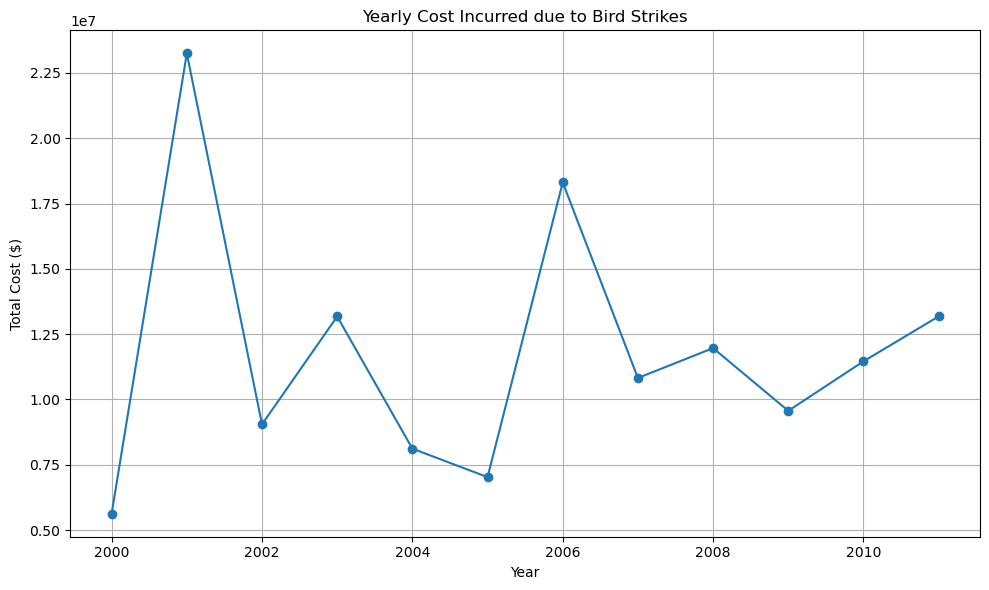

In [10]:
# Group by year and sum the total cost incurred
yearly_cost = bird_strike_data.groupby('Year')['Cost: Total $'].sum()

# Create a line chart for yearly cost incurred due to bird strikes
plt.figure(figsize=(10, 6))
yearly_cost.plot(kind='line', marker='o')
plt.title('Yearly Cost Incurred due to Bird Strikes')
plt.xlabel('Year')
plt.ylabel('Total Cost ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

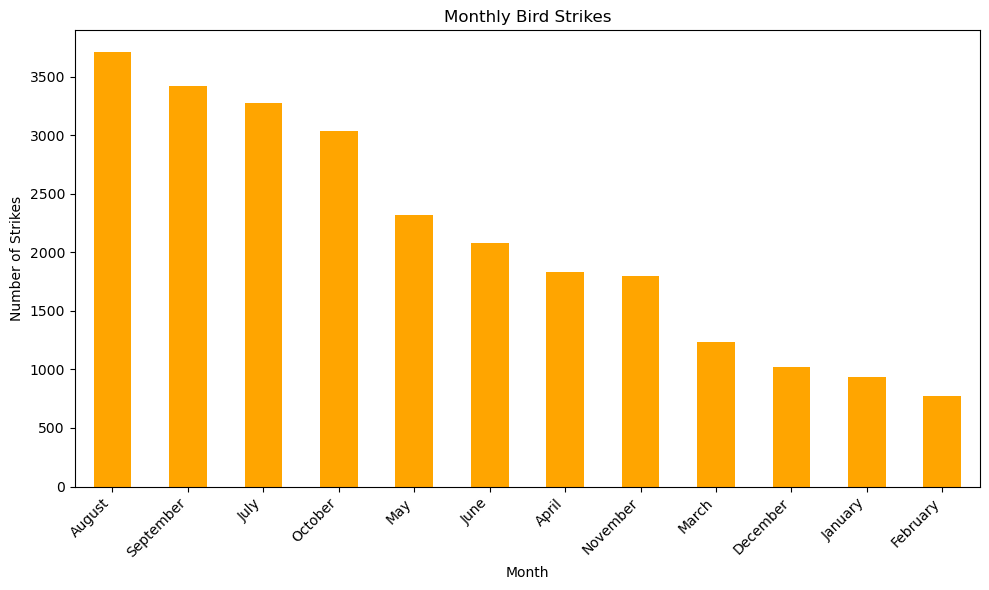

In [11]:
# Extract month from FlightDate
bird_strike_data['Month'] = bird_strike_data['FlightDate'].dt.month_name()

# Count the number of bird strikes by month
monthly_strikes = bird_strike_data['Month'].value_counts()

# Create a bar chart for month-wise bird strikes
plt.figure(figsize=(10, 6))
monthly_strikes.plot(kind='bar', color='orange')
plt.title('Monthly Bird Strikes')
plt.xlabel('Month')
plt.ylabel('Number of Strikes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

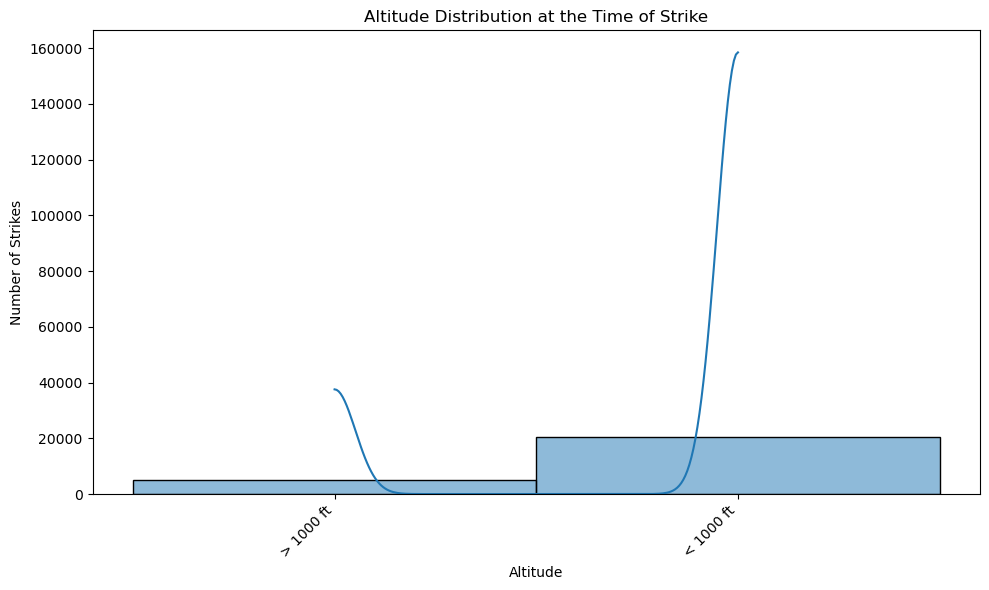

In [12]:
# Create a histogram for altitude distribution
plt.figure(figsize=(10, 6))
sns.histplot(bird_strike_data['Altitude bin'], bins=10, kde=True)
plt.title('Altitude Distribution at the Time of Strike')
plt.xlabel('Altitude')
plt.ylabel('Number of Strikes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


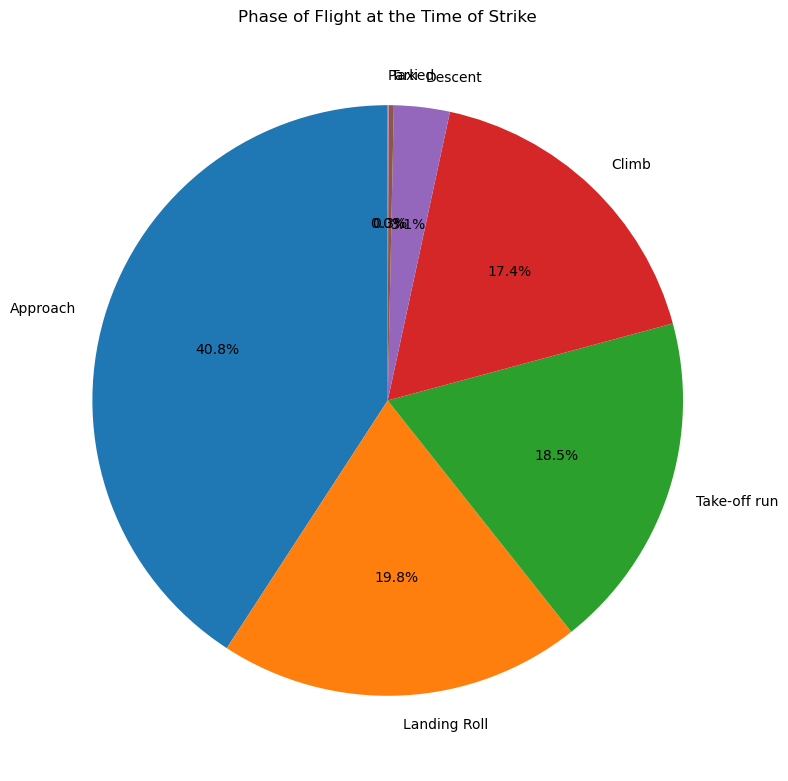

In [13]:
# Count the number of bird strikes by phase of flight
phase_counts = bird_strike_data['When: Phase of flight'].value_counts()

# Create a pie chart for phase of flight
plt.figure(figsize=(8, 8))
plt.pie(phase_counts, labels=phase_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Phase of Flight at the Time of Strike')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


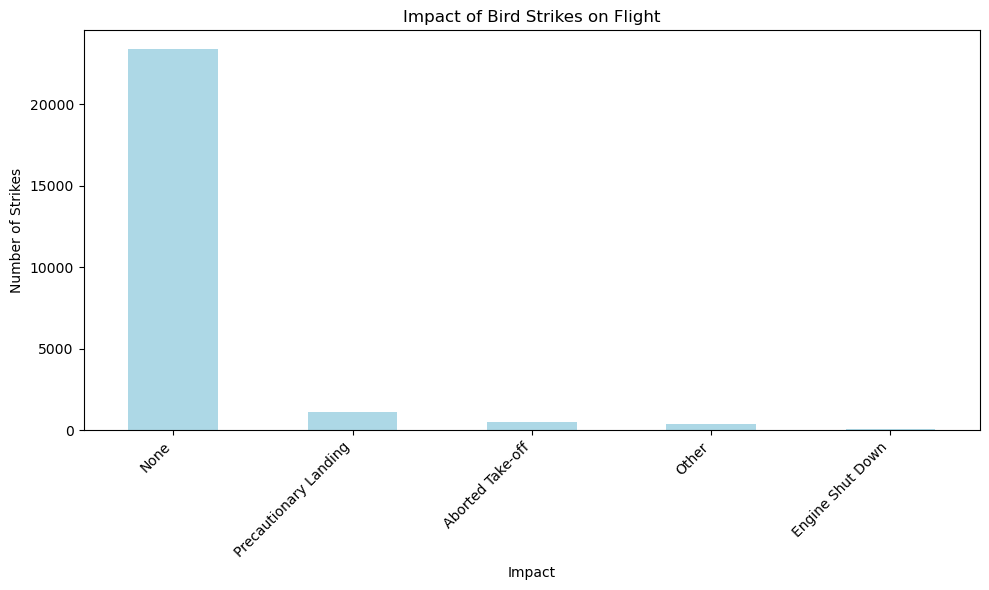

In [15]:
# Count the number of bird strikes by impact to flight
impact_counts = bird_strike_data['Effect: Impact to flight'].value_counts()

# Create a bar chart for impact to flight
plt.figure(figsize=(10, 6))
impact_counts.plot(kind='bar', color='lightblue')
plt.title('Impact of Bird Strikes on Flight')
plt.xlabel('Impact')
plt.ylabel('Number of Strikes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [17]:
# Create a cross tabulation (pivot table) for pilot warnings and effect
pilot_warning_effect = pd.crosstab(bird_strike_data['Pilot warned of birds or wildlife?'], bird_strike_data['Effect: Indicated Damage'])

# Display the cross tabulation
print("Cross Tabulation (Pilot Warnings vs. Effect of Strike):\n", pilot_warning_effect)


Cross Tabulation (Pilot Warnings vs. Effect of Strike):
 Effect: Indicated Damage            Caused damage  No damage
Pilot warned of birds or wildlife?                          
N                                            1532      13035
Y                                             922       9940
